In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, nsolve

In [2]:
from matplotlib.colors import LogNorm
from matplotlib import rcParams

In [3]:
from wrapper import solve_numeric

In [4]:
from wrapper import EQ1, EQ2, EQ3, EQ4

Define symbols for two codon model

In [5]:
Tt1, Tt2, Tc1, Tc2, Rb1, Rb2, fopt = symbols('Tt1 Tt2 Tc1 Tc2 Rb1 Rb2 fopt')
Rt, Rb, Tt, Tc, N, L, Ksp, Kbd, Kch = symbols('Rt Rb Tt Tc N L Ksp Kbd Kch')

In [6]:
EQ1 # ribosome on-off rate equilibrium

Eq(Kbd*N*(-Rb1 - Rb2 + Rt), Ksp*(Rb1*Tc1 + Rb2*Tc2)/L)

In [7]:
EQ2 # ribosome flux between codons

Eq(Rb1*Tc1*(1 - fopt), Rb2*Tc2*fopt)

In [8]:
EQ3 # charging-uncharging for tRNA 1

Eq(Kch*(-Tc1 + Tt1), Ksp*Rb1*Tc1)

In [9]:
EQ4 # charging-uncharging for tRNA 2

Eq(Kch*(-Tc2 + Tt2), Ksp*Rb2*Tc2)

In [10]:
# conversion for kbd used by Pinetree simulations
# necessary to make simulations agree with numeric solutions
def rbs_conversion(rbs):
    AVOGADRO = 6.02214076e23
    VOLUME = 8e-16
    return round(rbs / (AVOGADRO * VOLUME), 10)

### Solve with 50:50 tRNA ratio 

In [11]:
#RBS_STRENGTH = rbs_conversion(30000000)
fixed_params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 1250,
       Tt2: 1250,
       Ksp: 0.02,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_05 = solve_numeric(fixed_params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1250, Tt2: 1250, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1250, Tt2: 1250, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1250, Tt2: 1250, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1250, Tt2: 1250, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1250, Tt2: 1250, Ksp: 0.02, L: 300, Kch: 300}


In [12]:
# normalize colorscale values for plotting on log scale
norm = LogNorm(vmin=vals[0], vmax=vals[-1]) 

In [13]:
df_05["protein_expr_rate"] = df_05["protein"] / 100

In [14]:
df_05["Rf"] = 500 - df_05["Rb"]

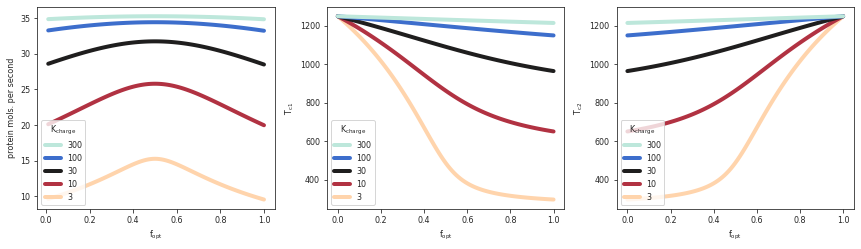

In [16]:
fig, ax = plt.subplots(1, 3)

plt.rcParams['figure.figsize'] = [12, 3.5]
plt.rcParams["text.usetex"] = False
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="protein_expr_rate", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette,
                 linewidth=4,
                 ax=ax[0])
g1.set_xlabel(r"$f_{opt}$")
g1.set_ylabel("protein mols. per second")
g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)

g2 = sns.lineplot(data=df_05, 
                  x="fopt", 
                  y="tc1", 
                  hue="kch", 
                  hue_norm=norm, 
                  palette=palette, 
                  linewidth=4,
                 ax=ax[1])
g2.set_xlabel(r"$f_{opt}$")
g2.set_ylabel(r"$T_{c1}$")
g2.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)

g3 = sns.lineplot(data=df_05, 
                  x="fopt", 
                  y="tc2", 
                  hue="kch", 
                  hue_norm=norm, 
                  palette=palette, 
                  linewidth=4,
                 ax=ax[2])
g3.set_xlabel(r"$f_{opt}$")
g3.set_ylabel(r"$T_{c2}$")
g3.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)

plt.tight_layout()
#plt.savefig("fig/kch_3_300_midpoint_trna_05_numeric.png")

In [17]:
L_codons = 300
# formula for calculating the ave. ribosome speed in codons / s
df_05["codons_per_second"] = (df_05["protein_expr_rate"] * L_codons) / df_05["Rb"]

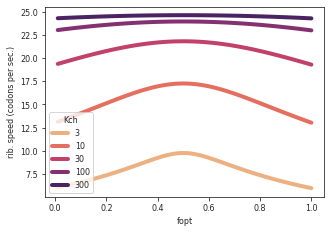

In [18]:
rcParams['figure.figsize'] = [5, 3.5]

g1 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="codons_per_second", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette="flare", 
                 linewidth=4,
                 )
g1.set_ylabel("rib. speed (codons per sec.)")
g1.legend(title="Kch", loc="lower left")

### Solve with 55:45, 70:30 and 90:10 tRNA ratios

In [19]:
#RBS_STRENGTH = rbs_conversion(30000000)
params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 1750,
       Tt2: 750,
       Ksp: 0.02,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_07 = solve_numeric(params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 300}


In [20]:
#RBS_STRENGTH = rbs_conversion(30000000)
params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 2250,
       Tt2: 250,
       Ksp: 0.02,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_09 = solve_numeric(params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 300}


In [21]:
#RBS_STRENGTH = rbs_conversion(30000000)
params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 1375,
       Tt2: 1125,
       Ksp: 0.02,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_55 = solve_numeric(params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 300}


In [22]:
df_07["trna_prop"] = 0.7
df_09["trna_prop"] = 0.9
df_55["trna_prop"] = 0.55

In [23]:
df_07["protein_expr_rate"] = df_07["protein"] / 100
df_09["protein_expr_rate"] = df_09["protein"] / 100
df_55["protein_expr_rate"] = df_55["protein"] / 100

In [24]:
df_07["Rf"] = 500 - df_07["Rb"]
df_09["Rf"] = 500 - df_09["Rb"]
df_55["Rf"] = 500 - df_55["Rb"]

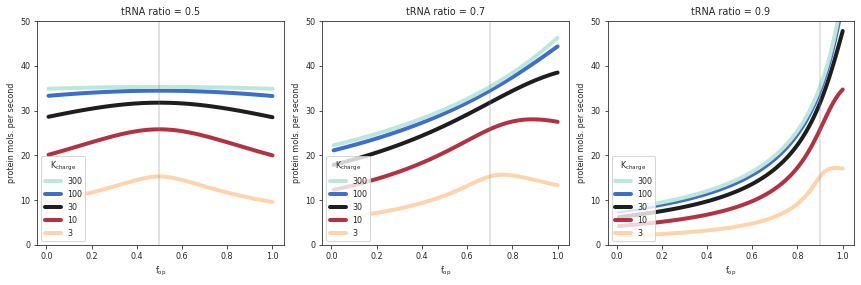

In [27]:
fig, ax = plt.subplots(1, 3) #figsize=(24, 6)

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

idx = 0
for df, label in zip([df_05, df_07, df_09], [0.5, 0.7, 0.9]):
    g1 = sns.lineplot(data=df, 
                     x="fopt", 
                     y="protein_expr_rate", 
                     hue="kch", 
                     hue_norm=norm, 
                     palette=palette,
                     linewidth=4,
                     ax=ax[idx])
    g1.set_xlabel(r"$f_{op}$")
    g1.set_ylim(0, 50)
    g1.set_ylabel("protein mols. per second")
    g1.set_title(f"tRNA ratio = {label}")
    g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)
    g1.axvline(label, alpha=0.3, color="grey")
    idx += 1

plt.tight_layout()
#plt.savefig("kch_3_300_midpoint_trna_05_07_09_numeric.png")

In [28]:
df_07["tc1_perc"] = df_07["tc1"] / 1750
df_07["tc2_perc"] = df_07["tc2"] / 750
df_07["Rb_perc"] = df_07["Rb"] / 500

In [29]:
df_09["tc1_perc"] = df_09["tc1"] / 2250
df_09["tc2_perc"] = df_09["tc2"] / 250
df_09["Rb_perc"] = df_09["Rb"] / 500

In [30]:
df_05["tc1_perc"] = df_05["tc1"] / 1250
df_05["tc2_perc"] = df_05["tc2"] / 1250
df_05["Rb_perc"] = df_05["Rb"] / 500

In [31]:
df_55["tc1_perc"] = df_55["tc1"] / 1375
df_55["tc2_perc"] = df_55["tc2"] / 1125
df_55["Rb_perc"] = df_55["Rb"] / 500

In [32]:
df_05["trna_prop"] = 0.5

In [33]:
df_combined = pd.concat([df_05, df_07, df_09, df_55])

In [34]:
df_combined.to_csv("two_codon_pref_trna_05_055_07_09_speed_0.02.csv")

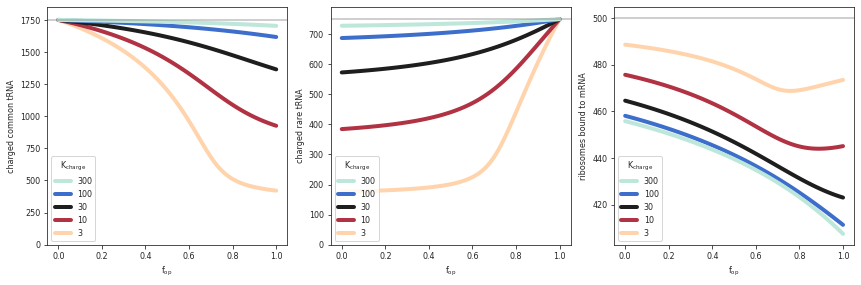

In [35]:
fig, ax = plt.subplots(1, 3) #figsize=(24, 6)

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

idx = 0
for species in ["tc1", "tc2", "Rb"]:
    g1 = sns.lineplot(data=df_07, 
                     x="fopt", 
                     y=species, 
                     hue="kch", 
                     hue_norm=norm, 
                     palette=palette,
                     linewidth=4,
                     ax=ax[idx])
    g1.set_xlabel(r"$f_{op}$")
    if species == "tc1":
        g1.set_ylim(0, 1850)
        g1.axhline(1750, alpha=0.5, color="grey")
        g1.set_ylabel("charged common tRNA")
    elif species == "tc2":
        g1.set_ylim(0, 790)
        g1.axhline(750, alpha=0.5, color="grey")
        g1.set_ylabel("charged rare tRNA")
    else:
        g1.axhline(500, alpha=0.5, color="grey")
        g1.set_ylabel("ribosomes bound to mRNA")
    g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)
    idx += 1

plt.tight_layout()
#plt.savefig("kch_3_300_midpoint_trna_07_species_counts.png")

### fop_max versus charging rate

In [36]:
fopmax_params = {N: 100,
       Kbd: 0.005,
       Rt: 500,
       Ksp: 0.02,
       L: 300}

In [46]:
vals = [0.025*(2**x) for x in range(0, 15)]

In [47]:
tRNA_ratios = [(1250, 1250), (1375, 1125), (1750, 750), (2250, 250)]
df_15 = None
for ratio in tRNA_ratios:
    params[Tt1] = ratio[0]
    params[Tt2] = ratio[1]
    tmp = solve_numeric(params, Kch, vals, name="kch", verbose=False)
    tmp["protein_expr_rate"] = tmp["protein"] / 100
    tmp["Rf"] = 500 - tmp["Rb"]
    # for each kcharge curve, get the point where protein expression is maximized
    tmp = tmp.loc[tmp.groupby('kch')['protein_expr_rate'].transform(max) == tmp['protein_expr_rate']].reset_index()
    tmp["ratio"] = ratio[0] / (ratio[0]+ratio[1])
    if df_15 is not None:
        df_15 = df_15.append(tmp, ignore_index=True)
    else:
        df_15 = tmp

In [48]:
print(sns.color_palette("colorblind", 4).as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00']


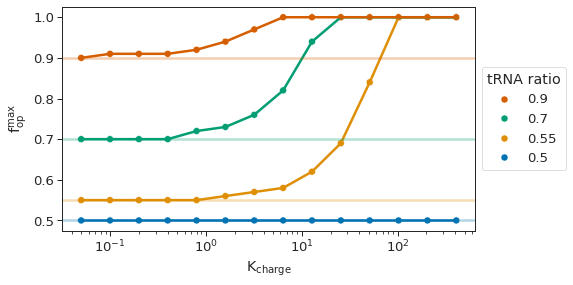

In [50]:
#fig, ax = plt.subplots(1, 2) #figsize=(24, 6)
df_pl = df_15[(df_15.kch > 0.025) & (df_15.ratio < 0.99) & (df_15.fopt > 0)]

sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

#palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.scatterplot(data=df_pl, 
                 x="kch", 
                 y="fopt", 
                 hue="ratio",
                 palette="colorblind",
                 s=50,
#                height=4, aspect=1
#                 ax=ax[0]
                )

g2 = sns.lineplot(data=df_pl, 
                 x="kch", 
                 y="fopt", 
                 hue="ratio",
                 palette="colorblind",
                 legend=False
#                height=4, aspect=1
#                 ax=ax[0]
                )

g1.set_xlabel(r"$K_{charge}$")
g1.set_ylabel(r"$f_{op}^{max}$")
g1.set_xscale("log")
g1.legend(title="tRNA ratio", reverse=True, loc='center left', bbox_to_anchor=(1, 0.5))

g1.axhline(0.9, alpha=0.3, color="#d55e00")
g1.axhline(0.7, alpha=0.3, color="#029e73")
g1.axhline(0.55, alpha=0.3, color="#de8f05")
g1.axhline(0.5, alpha=0.3, color="#0173b2")


plt.tight_layout()
#plt.savefig("fig/kcharge_vs_fop_max.png", bbox_inches="tight")

In [51]:
df_15.to_csv("fop_max_15_points_speed_0.02.csv")